Before you turn in the homework, make sure everything runs as expected. To do so, select **Kernel**$\rightarrow$**Restart & Run All** in the toolbar above.  Remember to submit both on **DataHub** and **Gradescope**.

Please fill in your name and include a list of your collaborators below.

In [1]:
NAME = "Michelle Fang"
COLLABORATORS = "Timothy Cruz, Janet Li, Sydney Chang"

---

# Project 2: NYC Taxi Rides
# Extras

Put all of your extra work in here. Feel free to save figures to use when completing Part 4.

In [2]:
import os
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sqlalchemy import create_engine
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

sns.set(style="whitegrid", palette="muted")

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

%matplotlib inline

In [3]:
# Run this cell to load the data. 
data_file = Path("./", "cleaned_data.hdf")
train_df = pd.read_hdf(data_file, "train")
val_df = pd.read_hdf(data_file, "val")

In [4]:
train_df.head()

,record_id,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
13242,5711100,1,2016-01-17 17:48:41,2016-01-17 17:55:53,1,1.00,-74.006470,40.738766,1,N,...,40.735664,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,432.0
12723,4989400,1,2016-01-17 01:18:39,2016-01-17 01:21:15,1,0.40,-73.989365,40.763000,1,N,...,40.766121,2,4.0,0.5,0.5,0.00,0.00,0.3,5.30,156.0
8508,2436400,2,2016-01-12 09:07:00,2016-01-12 09:41:17,1,11.40,-73.984108,40.774509,1,N,...,40.770458,1,37.0,0.0,0.5,8.67,5.54,0.3,52.01,2057.0
21304,10899100,2,2016-01-29 09:07:54,2016-01-29 09:18:25,1,1.42,-74.002907,40.760262,1,N,...,40.742764,1,8.5,0.0,0.5,1.00,0.00,0.3,10.30,631.0
3817,1319400,1,2016-01-06 11:44:54,2016-01-06 11:49:55,1,0.80,-73.969742,40.760273,1,N,...,40.751129,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80,301.0


In [5]:
train_df = train_df[train_df['duration'] < 6000]

In [6]:
train_df = train_df[train_df['fare_amount'] < 60]

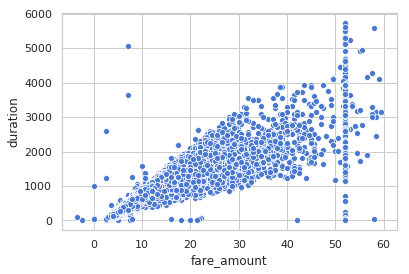

In [7]:
sns.scatterplot(x=train_df['fare_amount'], y=train_df['duration'])

In [8]:
train_df = train_df[train_df['trip_distance'] < 25]

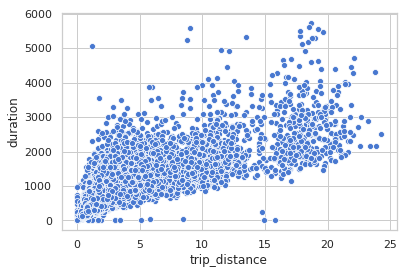

In [9]:
sns.scatterplot(x=train_df['trip_distance'], y=train_df['duration'])

In [10]:
train_df = train_df[train_df['total_amount'] < 80]

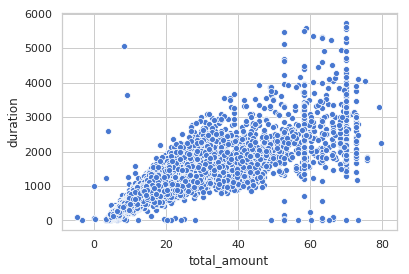

In [11]:
sns.scatterplot(x=train_df['total_amount'], y=train_df['duration'])

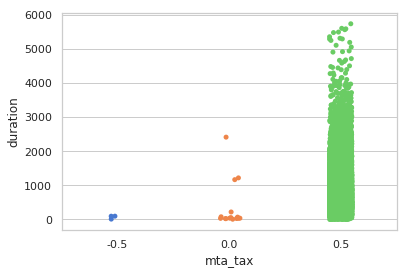

In [12]:
sns.stripplot(x=train_df['mta_tax'], y=train_df['duration'])

I cleaned the outliers from the duration column in the dataframe, because rides in the Manhattan area, that we're analyzing, should not be more than 3 hours long. Some of the features I chose to use were fare_amount, trip_distance, total_amount, hour, and mta_tax. I also chose to remove the outliers from each of the features I selected, so they
wouldn't influence the predictions. The features I selected have linear relationships with duration, because
they would be best for indicating which features correlate with the duration.

## Submission

You're almost done!

Before submitting this assignment, ensure that you have:

1. Restarted the Kernel (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Validated the notebook by clicking the "Validate" button.

Then,

1. **Submit** the assignment via the Assignments tab in **Datahub** 
1. **Upload and tag** the manually reviewed portions of the assignment on **Gradescope**